In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [58]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [59]:

train.head()



,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,Clear,63,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,Stormy,83,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0


### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Your code along with reasoning
print(train.info())
print(train.describe())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63015 entries, 0 to 63014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63015 non-null  object 
 1   average_fare         63015 non-null  float64
 2   rides_completed      63015 non-null  int64  
 3   driver_availability  63015 non-null  float64
 4   surge_multiplier     63015 non-null  float64
 5   vehicle_type         63015 non-null  object 
 6   weather              63015 non-null  object 
 7   traffic_index        63015 non-null  int64  
 8   special_event        63015 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 4.3+ MB
None
       average_fare  rides_completed  driver_availability  surge_multiplier  \
count  63015.000000     63015.000000         63015.000000      63015.000000   
mean      70.186256       376.739760            44.695420          1.253939   
std       39.465587       302.994799  

In [33]:
vehicle_summary = train.groupby('vehicle_type').agg({
    'average_fare': ['mean', 'median', 'std'],
    'rides_completed': ['mean', 'median', 'std'],
    'driver_availability': ['mean', 'median'],
    'surge_multiplier': 'mean'
})
print(vehicle_summary)

             average_fare                        rides_completed         \
                     mean      median        std            mean median   
vehicle_type                                                              
auto            41.314517   40.010248   1.915105      448.654320  442.0   
bike            47.293100   46.914986  16.840520      554.355725  478.0   
car            121.951152  120.695550  18.654883      127.209236  120.0   

                         driver_availability            surge_multiplier  
                     std                mean     median             mean  
vehicle_type                                                              
auto          224.878388           42.315786  40.471087         1.247732  
bike          346.842243           57.578153  57.803355         1.269177  
car            74.613174           34.192322  30.000000         1.244908  


Cost and Demand: Cars are the most expensive, followed by bikes, then autos. However, bikes have the highest demand (rides completed) despite their fares being higher than autos, possibly indicating that they are popular for shorter trips or specific travel needs.

Driver Availability: Bikes also have the highest driver availability, which matches their high demand. However, the variability in driver availability and rides completed for bikes suggests that demand and supply for bikes are more unpredictable.

Surge Pricing: Surge multipliers don’t differ significantly between vehicle types, implying that fare surges aren’t strongly tied to any particular type.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

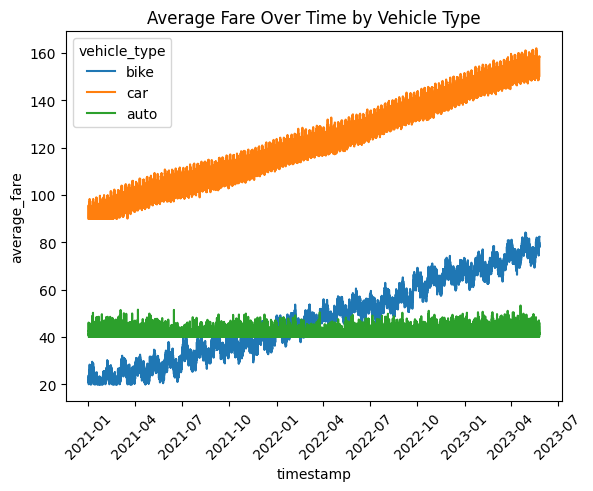

In [62]:
# Convert timestamp to datetime for time series analysis
train['timestamp'] = pd.to_datetime(train['timestamp'])
sns.lineplot(data=train, x='timestamp', y='average_fare', hue='vehicle_type')
plt.title('Average Fare Over Time by Vehicle Type')
plt.xticks(rotation=45) 
plt.show()

In [35]:
weather_traffic_impact = train.groupby(['weather', 'vehicle_type']).agg({
    'average_fare': ['mean', 'std'],
    'surge_multiplier': 'mean',
    'traffic_index': 'mean'
}).reset_index()
print(weather_traffic_impact)

   weather vehicle_type average_fare            surge_multiplier traffic_index
                                mean        std             mean          mean
0    Clear         auto    41.314913   1.918898         1.209634     59.447491
1    Clear         bike    47.119891  16.726683         1.229032     59.542052
2    Clear          car   121.896873  18.628712         1.205816     59.556474
3   Cloudy         auto    41.328062   1.927707         1.205053     59.786546
4   Cloudy         bike    47.595283  17.078826         1.231422     59.682169
5   Cloudy          car   121.871215  18.741733         1.212203     59.587264
6    Rainy         auto    41.303032   1.905774         1.405468     59.291414
7    Rainy         bike    47.372907  16.829670         1.428870     59.144437
8    Rainy          car   122.436589  18.629120         1.397650     59.232434
9   Stormy         auto    41.288764   1.844754         1.413563     59.486139
10  Stormy         bike    47.941969  17.273941     

Fares for cars are consistently higher across all weather conditions compared to bikes and autos, with averages around 121-122.
Fares show higher variability in bikes (std is higher), especially under stormy and cloudy weather.

surge_multiplier is the average surge multiplier applied to fares under each combination of weather and vehicle_type. Surge multipliers are generally higher during Rainy and Stormy weather across all vehicle types, likely due to increased demand or decreased driver availability. 

traffic index remains relatively stable across all combinations, indicating that while traffic levels do fluctuate slightly, they are not highly sensitive to changes in weather or vehicle type. However, there is a small increase in traffic during Stormy conditions, possibly reflecting more congestion as more people may use rides instead of walking or biking. 

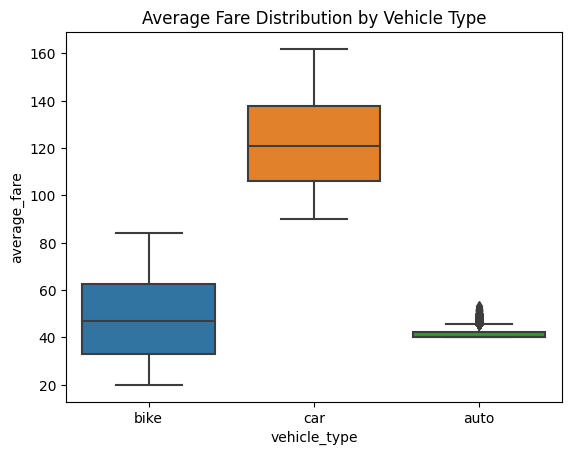

In [36]:
sns.boxplot(data=train, x='vehicle_type', y='average_fare')
plt.title('Average Fare Distribution by Vehicle Type')
plt.show()

For autos, multiple outliers visible as black dots above the upper whisker.
These outliers appear to be around the 55-60 fare range
The presence of these outliers but very tight IQR suggests these are likely unusual cases or special circumstances. These could represent surge pricing periods or longer distances than typical auto rides.

Car service has high variance but appears normally distributed without outliers, while Bike service shows moderate variance, also without outliers.

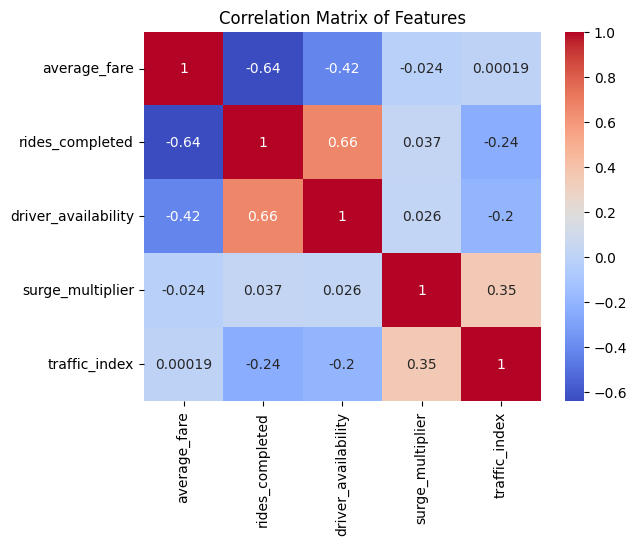

In [37]:
corr = train[['average_fare', 'rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

The features strongly correlated are:

1. Average Fare & Rides Completed with -0.64: Strong negative correlation; As fares increase, number of rides decreases. Suggests price sensitivity among customers.

2. Driver Availability & Rides Completed with 0.66: Strong positive correlation. More available drivers leads to more completed rides. Indicates supply directly affects service utilization.

3. Average Fare & Driver Availability with -0.42: Moderate negative correlation. Higher fares correlate with lower driver availability. Could suggest driver preference for high-fare times/areas.



/tmp/ipykernel_30/1743614431.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(event_df['average_fare'], label='Special Event', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/1743614431.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_event_df['average_fare'], label='No Special Event', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

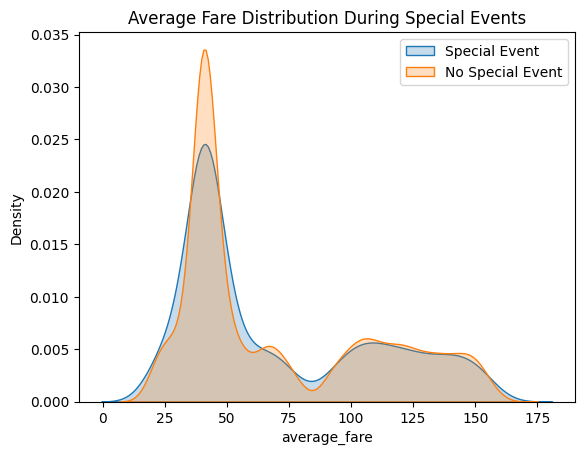

In [38]:
#Event vs. Non-Event Comparison
event_df = train[train['special_event'] == 1]
non_event_df = train[train['special_event'] == 0]

sns.kdeplot(event_df['average_fare'], label='Special Event', shade=True)
sns.kdeplot(non_event_df['average_fare'], label='No Special Event', shade=True)
plt.title('Average Fare Distribution During Special Events')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

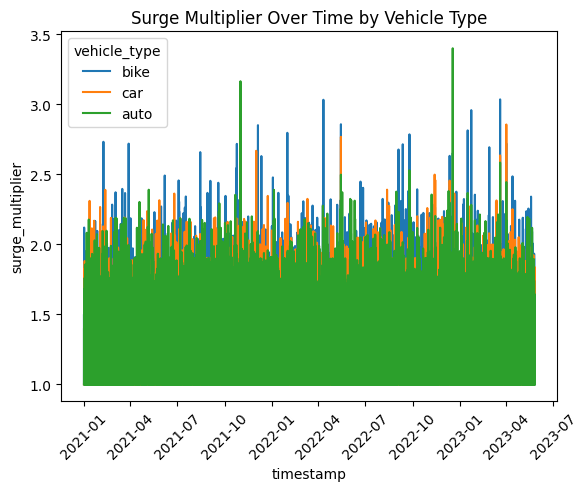

In [39]:
#Line Plot of Surge Multiplier over Time
sns.lineplot(data=train, x='timestamp', y='surge_multiplier', hue='vehicle_type')
plt.title('Surge Multiplier Over Time by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

Bike (blue) shows the highest peak surges, reaching up to 3.0-3.5x. Car (orange) typically has moderate surge levels. Auto (green) shows consistent base-level surge activity with occasional high spikes. The baseline surge appears similar across all vehicle types.

Bikes show the most volatile surge pricing.

This suggests: 
1. Different vehicle types have different surge pricing strategies.
2. The system allows for significant price increases during high-demand periods
3. Surge pricing is a regular feature of the pricing model rather than an exceptional occurrence

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

<Figure size 1200x800 with 0 Axes>

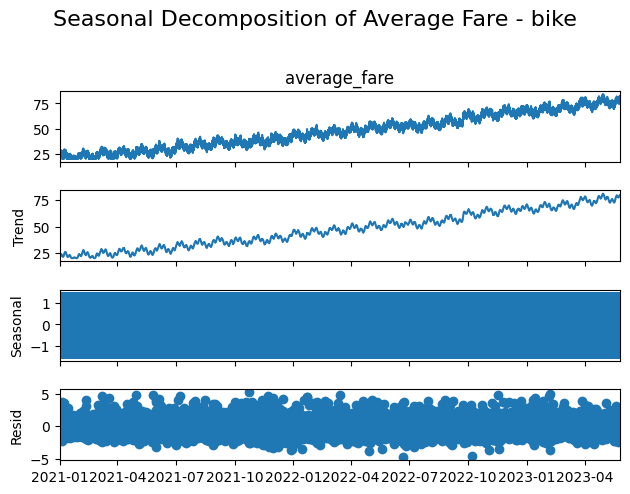

<Figure size 1200x800 with 0 Axes>

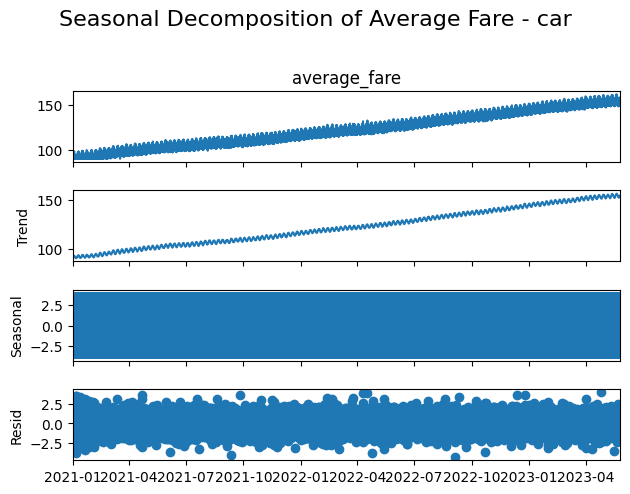

<Figure size 1200x800 with 0 Axes>

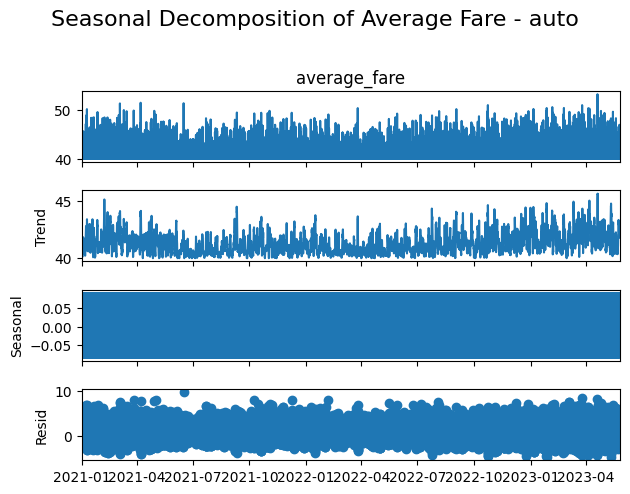

In [40]:
#decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose
for vehicle in train['vehicle_type'].unique():
    vehicle_data = train[train['vehicle_type'] == vehicle]
    decomposition = seasonal_decompose(vehicle_data.set_index('timestamp')['average_fare'], model='additive', period=24)
    
    # Create a larger figure for each decomposition
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    
    # Set the main title with padding
    plt.suptitle(f'Seasonal Decomposition of Average Fare - {vehicle}', fontsize=16, y=1.02)
    
    # Adjust layout to give space between plots
    plt.subplots_adjust(hspace=0.4, top=0.85)
    
    plt.show()

**Bikes:**
Trend Component: Strong upward trend, almost tripling from 25Rs to 75Rs over 2.5 years. The increase appears to be relatively steady and linear. Trend line is smoother than the raw data, showing the underlying price growth

Seasonal Component: Very minimal seasonal variation (mostly flat around 1). This suggests bike fares don't significantly vary by season. No clear annual or monthly patterns

**Cars:**
Trend Component: Clear upward trend from about 95Rs to 155Rs. Approximately 60% increase over 2.5 years. More linear and consistent than bike trend. Smoother progression suggesting systematic price increases. Rate of increase appears relatively constant.

Seasonal Component: Very minimal seasonal variation (stable around 2.5). Like bikes, shows little to no seasonal pricing pattern. Consistent throughout the year. Suggests pricing strategy doesn't factor in seasonal demand

**Autos:**
Trend Component: Remarkably stable around 40-45 units. Minimal long-term trend movement. Sharp contrast to the strong upward trends seen in bikes and cars. Slight variations but no consistent directional change.

Seasonal Component: Very minimal seasonal effect (around 0.05). Like bikes and cars, shows virtually no seasonal pattern. Consistent across the entire period. Confirms company-wide non-seasonal pricing strategy

The average fare shows no clear long-term upward trend unlike bikes and cars.

In [41]:
#Dickey Fuller Test to see if time series stationary/non stationary:
from statsmodels.tsa.stattools import adfuller
for vehicle in train['vehicle_type'].unique():
    vehicle_data = train[train['vehicle_type'] == vehicle].set_index('timestamp')['average_fare']
    result = adfuller(vehicle_data)
    print(f'{vehicle} - ADF Statistic: {result[0]}')
    print(f'{vehicle} - p-value: {result[1]}')

bike - ADF Statistic: -1.5575504421726767
bike - p-value: 0.5048745215832674
car - ADF Statistic: -1.8619436504858908
car - p-value: 0.3501702333000294
auto - ADF Statistic: -20.739513354918834
auto - p-value: 0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

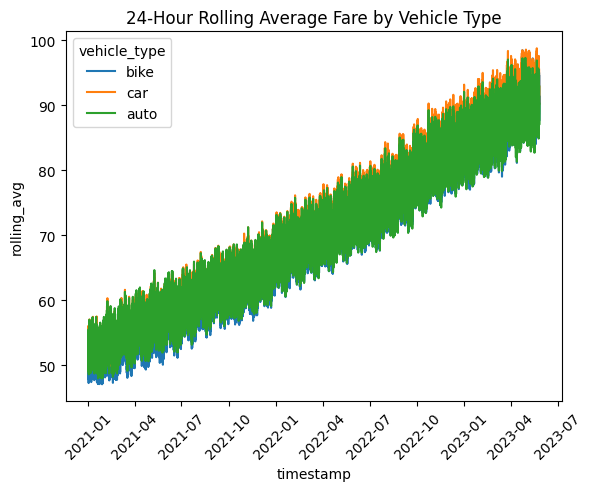

In [42]:
#Rolling average plot
train['rolling_avg'] = train['average_fare'].rolling(window=24).mean()  # Assuming hourly data
sns.lineplot(data=train, x='timestamp', y='rolling_avg', hue='vehicle_type')
plt.title('24-Hour Rolling Average Fare by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

There's a clear upward trend across all vehicle types over the ~2.5 year period. The lines for all three vehicle types track very closely together. Car fares (orange) tend to be slightly higher than auto (green). Bike fares (blue) appear to track along the lower end.

Time-Based Observations: The increase appears to be relatively steady/linear. There are small fluctuations throughout, but the overall trend is consistently upward. The rate of increase seems to be slightly steeper in the latter half of 2022 and early 2023.

/tmp/ipykernel_30/3787097434.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/3787097434.py:28: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/3787097434.py:32: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


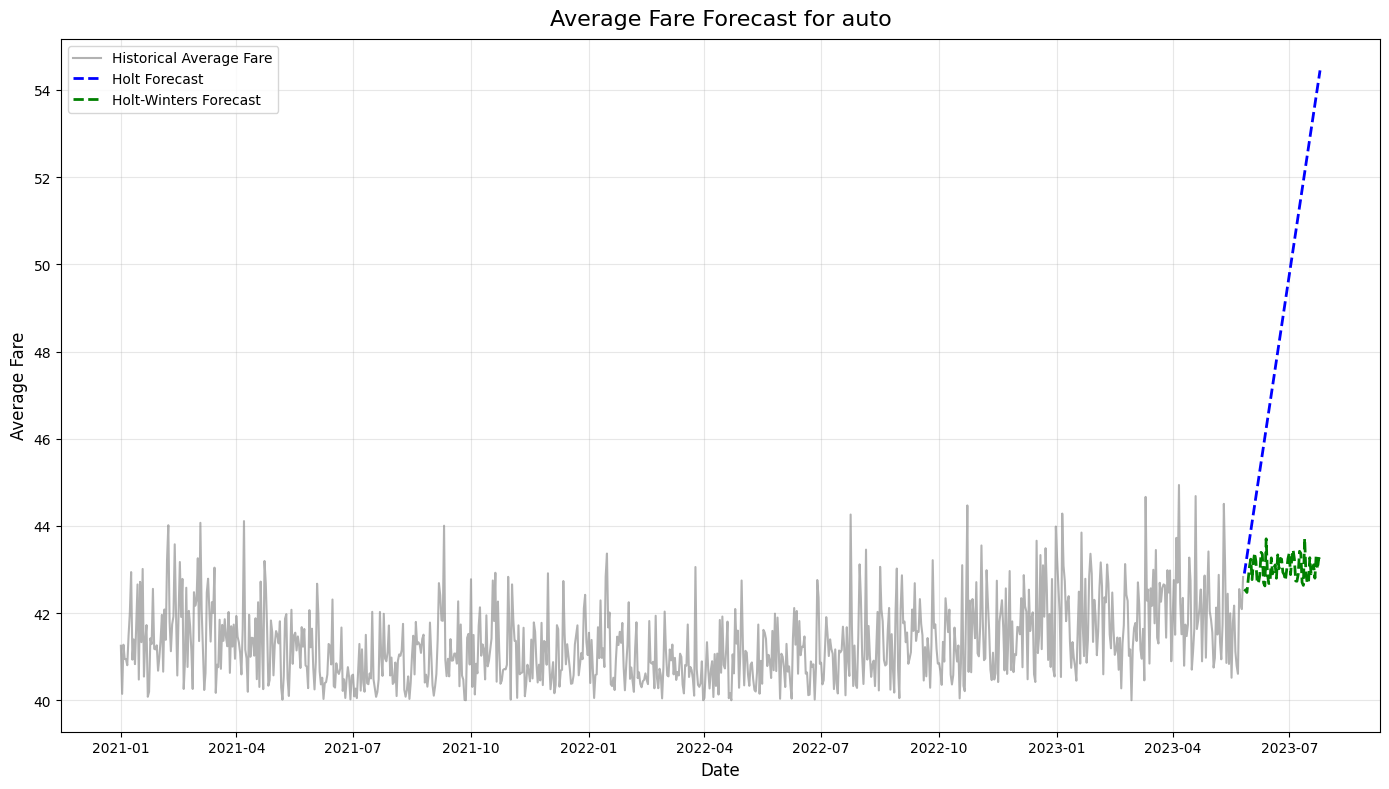

/tmp/ipykernel_30/3787097434.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/3787097434.py:28: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/3787097434.py:32: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


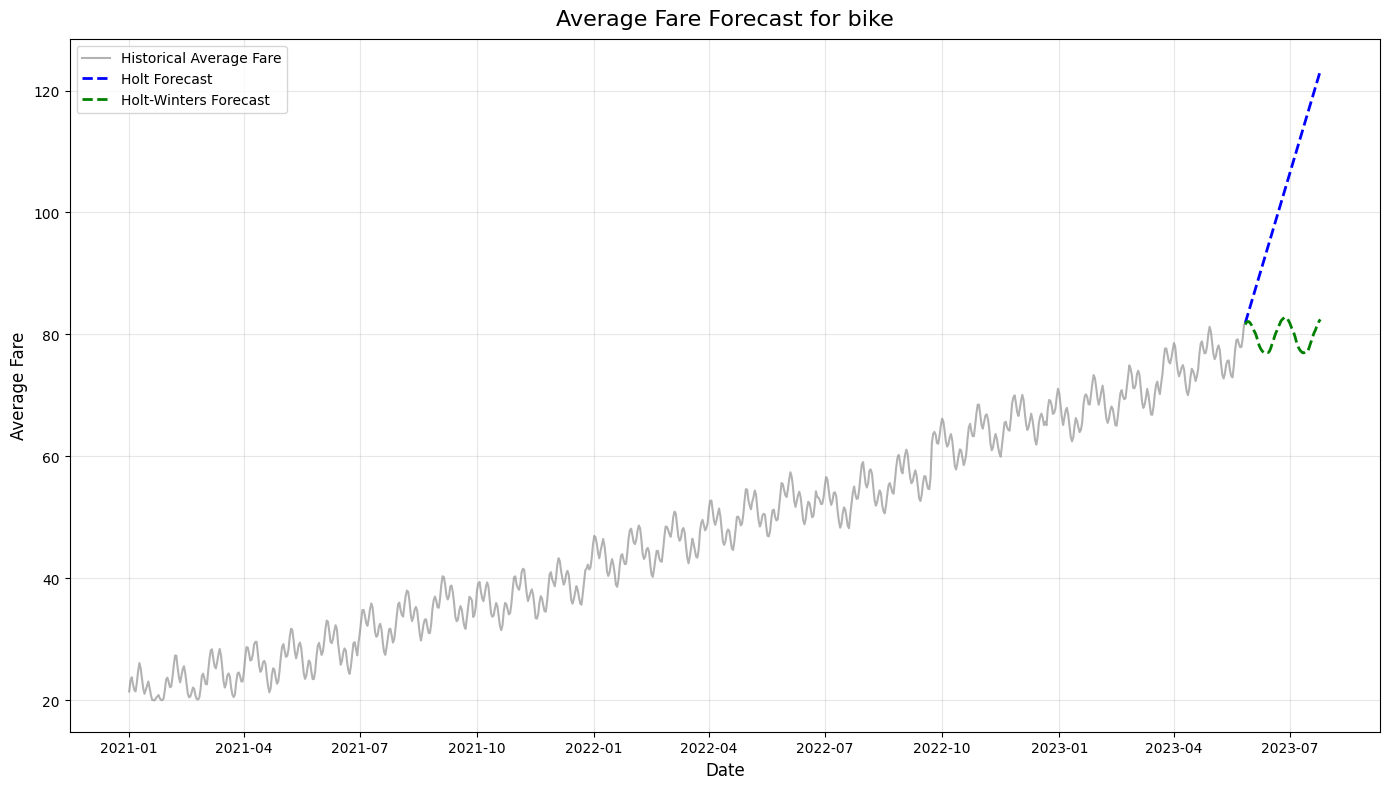

/tmp/ipykernel_30/3787097434.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/3787097434.py:28: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/3787097434.py:32: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


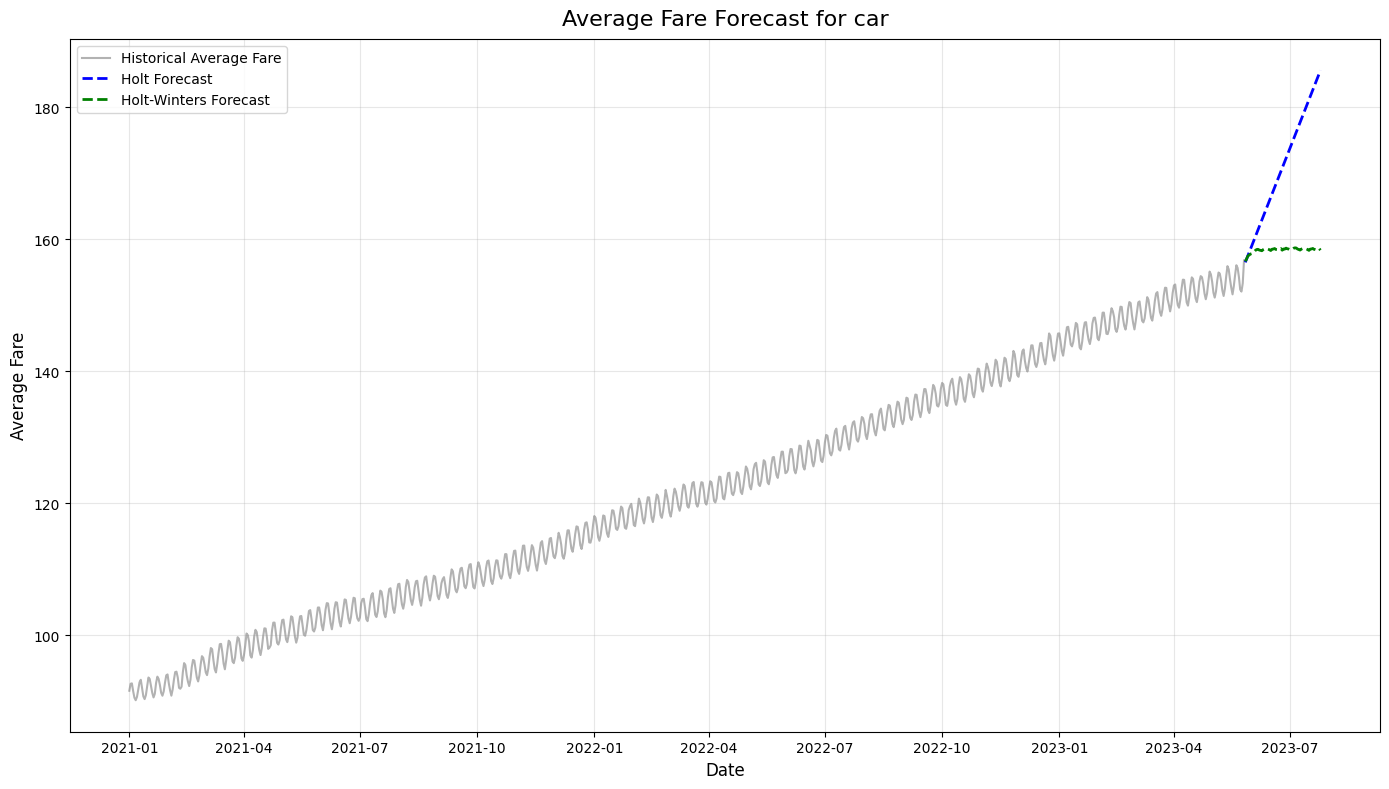

In [43]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# Group data by vehicle type
vehicle_groups = train.groupby('vehicle_type')

# Set forecasting parameters
forecast_period = 60  # Increase the forecast period to allow for a more spaced-out view

# Dictionary to store forecasts
forecast_results = {}

for vehicle, group in vehicle_groups:
    # Sort data by timestamp and set timestamp as index
    group = group.sort_values(by='timestamp')
    group.set_index('timestamp', inplace=True)
    average_fare = group['average_fare']
    
    # Ensure the index is datetime and has regular frequency
    if not isinstance(average_fare.index, pd.DatetimeIndex):
        average_fare.index = pd.to_datetime(average_fare.index)
    
    # Resample to ensure regular frequency (assuming daily data)
    average_fare = average_fare.resample('D').mean().fillna(method='ffill')
    
    # Holt's Linear Trend Model
    holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
    holt_forecast = holt_model.forecast(forecast_period)
    
    # Holt-Winters Seasonal Model with adjusted parameters
    hw_model = ExponentialSmoothing(
        average_fare,
        trend='add',
        seasonal='add',
        seasonal_periods=30,  # Adjust based on your data periodicity
        damped=True  # Add damping to prevent explosive forecasts
    ).fit(
        smoothing_level=0.8,
        smoothing_trend=0.2,
        smoothing_seasonal=0.1
    )
    
    hw_forecast = hw_model.forecast(forecast_period)
    
    # Create future dates for plotting
    last_date = average_fare.index[-1]
    future_dates = pd.date_range(start=last_date, periods=forecast_period + 1)[1:]
    holt_forecast.index = future_dates
    hw_forecast.index = future_dates
    
    # Store results
    forecast_results[vehicle] = {
        'holt_forecast': holt_forecast,
        'holtwinters_forecast': hw_forecast
    }
    
    # Plot results with enhanced styling and increased figure width
    plt.figure(figsize=(14, 8))  # Increased width for a more spaced-out forecast
    plt.plot(average_fare, label='Historical Average Fare', color='gray', alpha=0.6, linewidth=1.5)
    plt.plot(holt_forecast, label='Holt Forecast', color='blue', linestyle='--', linewidth=2)
    plt.plot(hw_forecast, label='Holt-Winters Forecast', color='green', linestyle='--', linewidth=2)
    
    # Add plot title, labels, and legend
    plt.title(f'Average Fare Forecast for {vehicle}', fontsize=16, pad=10)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Fare', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


    




# **Submission.csv file generation**

In [44]:
import pandas as pd

# Define forecast period and start date based on last date in your historical data
forecast_period = 60  # Number of days to forecast
last_date = max(forecast_results['bike']['holtwinters_forecast'].index) - pd.Timedelta(days=forecast_period)
future_dates = pd.date_range(start=last_date, periods=forecast_period, freq='D')

# Initialize the submission DataFrame with the required columns
submission = pd.DataFrame({
    'timestamp': future_dates,
    'average_fare_bike': forecast_results['bike']['holtwinters_forecast'].values,
    'average_fare_auto': forecast_results['auto']['holtwinters_forecast'].values,
    'average_fare_car': forecast_results['car']['holtwinters_forecast'].values
})

# Save the submission DataFrame to 'sample.csv'
submission.to_csv('sample.csv', index=False)

print("Submission file 'sample.csv' generated successfully.")


Submission file 'sample.csv' generated successfully.


In [45]:
# Load the CSV file
submission_df = pd.read_csv('sample.csv')

# Display the first 5 rows of the file
print(submission_df.head())

    timestamp  average_fare_bike  average_fare_auto  average_fare_car
0  2023-05-26          81.613210          42.498885        156.649644
1  2023-05-27          82.015201          42.534266        156.996397
2  2023-05-28          82.112632          42.472745        157.449977
3  2023-05-29          82.076134          42.768789        157.590323
4  2023-05-30          81.813437          43.070974        157.746438


# Residual analysis 

Why did we choose Holt-Winters method?
Choosing the Holt-Winters method for time series forecasting is often justified based on the following reasons:

1. Presence of Seasonality
* Holt-Winters is specifically designed to handle seasonality in time series data. It works well when the data exhibits clear periodic trends (seasonality) and/or a trend component. In your case, if the data has repeating patterns (e.g., weekly, monthly), the seasonal component of the Holt-Winters method is particularly useful.

* The additive or multiplicative seasonal components in the Holt-Winters method can capture regular seasonal fluctuations, making it a good choice for datasets where these seasonal effects are prominent, like transportation fare data that might exhibit patterns related to time of day, week, or year.

2. Incorporation of Trend
* Holt-Winters also accounts for the trend in the data. If the data has a consistent upward or downward trend (e.g., increasing fares over time), the trend component in Holt-Winters helps model this aspect and make forecasts accordingly.

/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


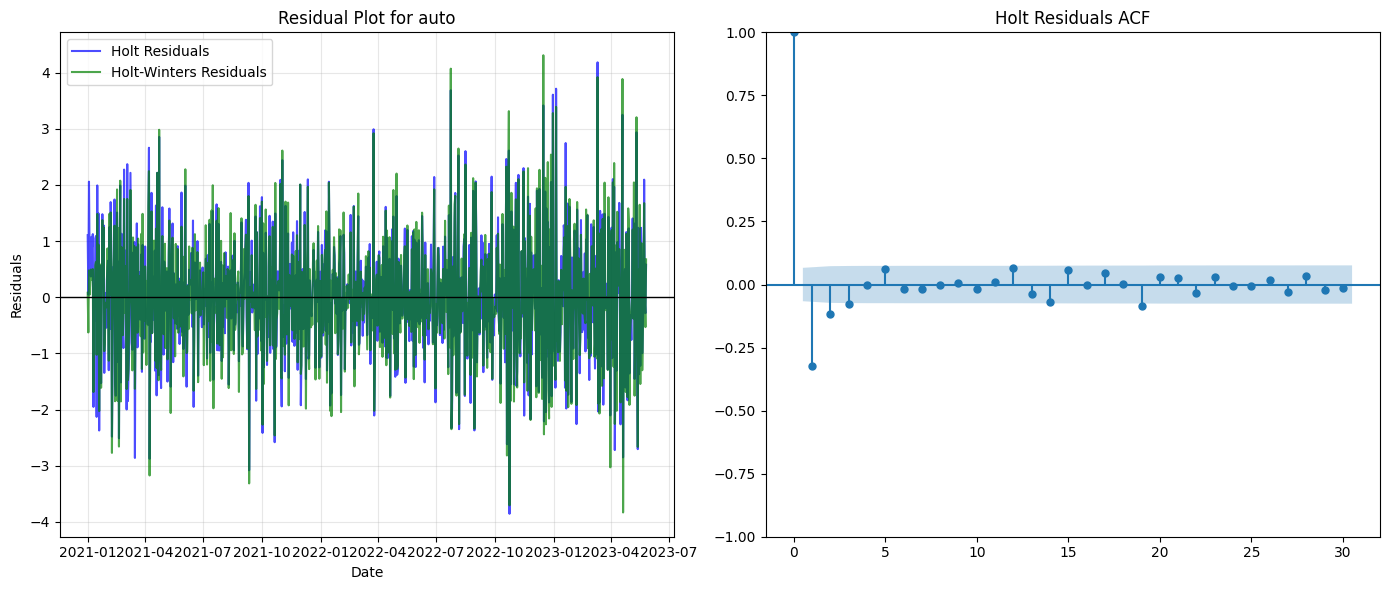

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


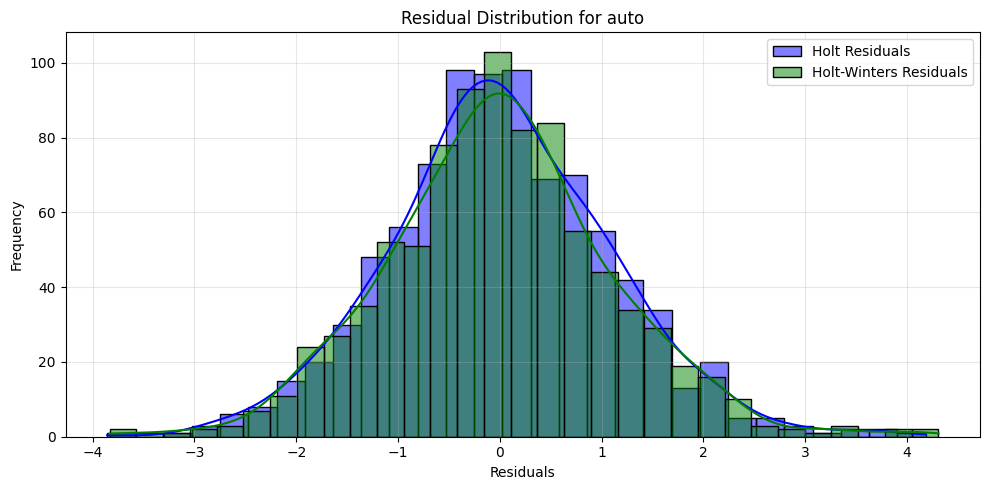

/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


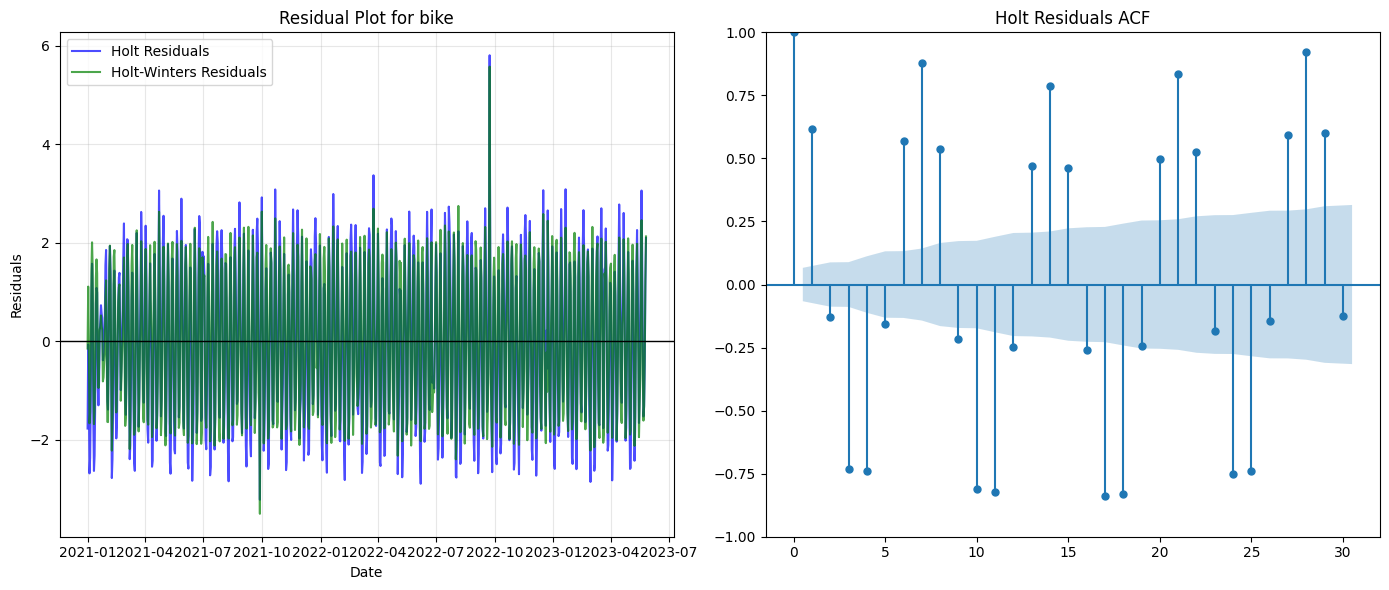

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


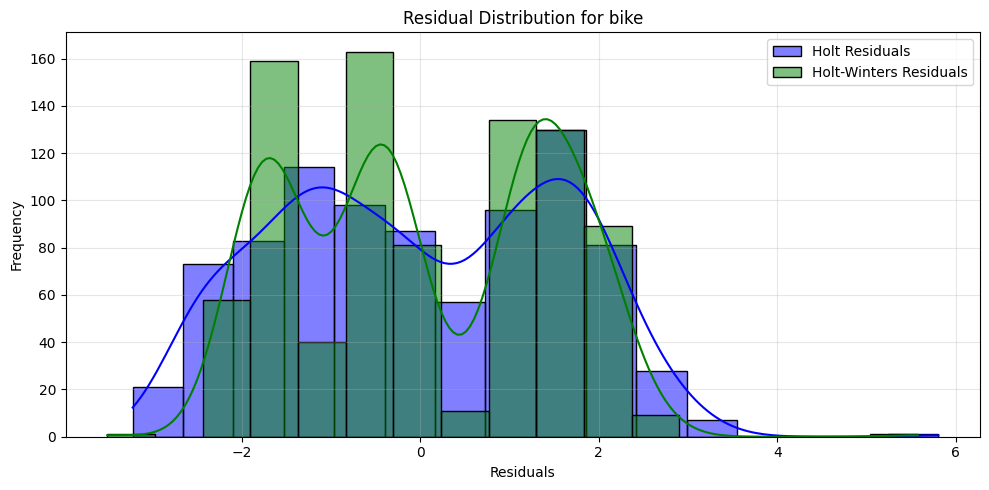

/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


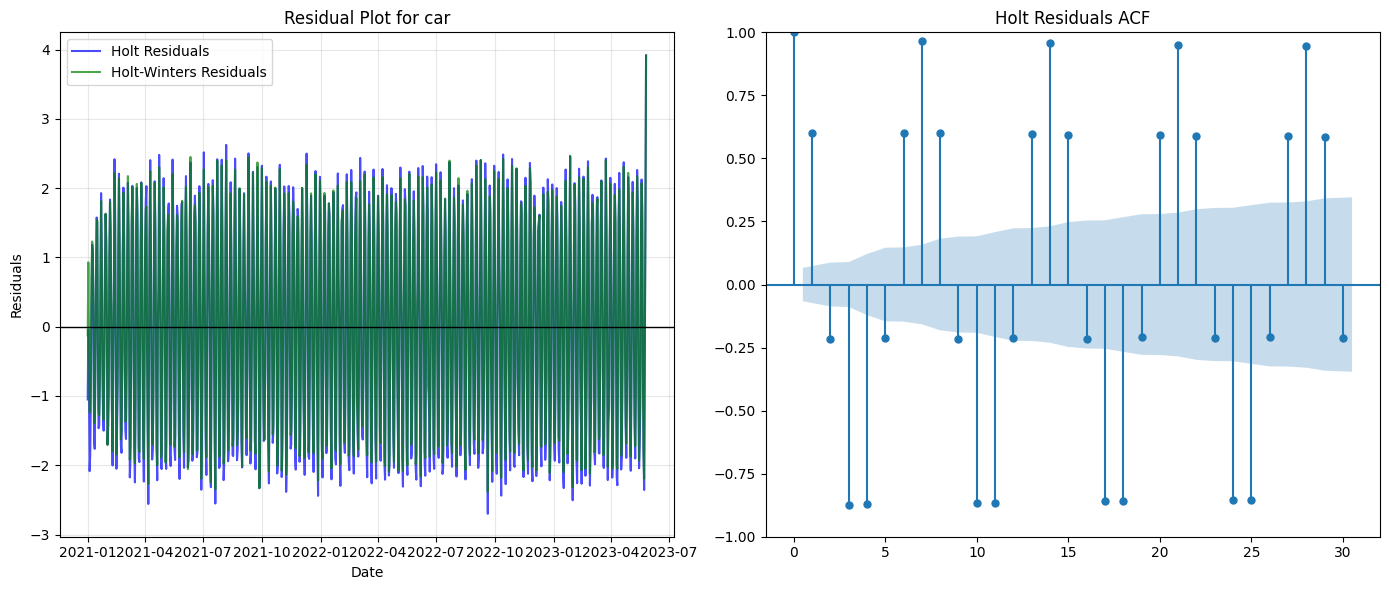

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


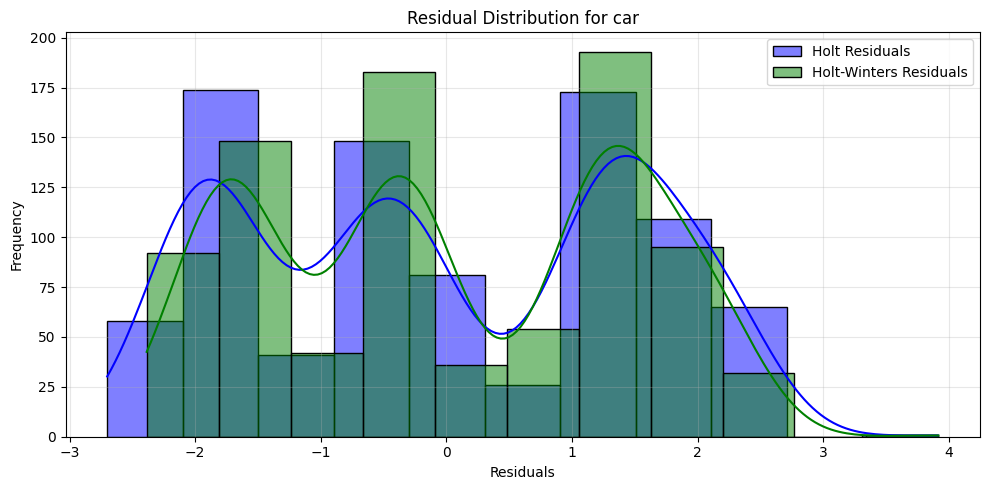

In [46]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set forecasting parameters
forecast_period = 60

# Dictionary to store forecasts and residuals
forecast_results = {}

for vehicle, group in train.groupby('vehicle_type'):
    # Sort data by timestamp and set timestamp as index
    group = group.sort_values(by='timestamp')
    group.set_index('timestamp', inplace=True)
    average_fare = group['average_fare']
    
    # Ensure the index is datetime and has regular frequency
    average_fare.index = pd.to_datetime(average_fare.index)
    average_fare = average_fare.resample('D').mean().fillna(method='ffill')
    
    # Holt's Linear Trend Model
    holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
    holt_residuals = average_fare - holt_model.fittedvalues
    
    # Holt-Winters Seasonal Model
    hw_model = ExponentialSmoothing(
        average_fare,
        trend='add',
        seasonal='add',
        seasonal_periods=30,
        damped=True
    ).fit(smoothing_level=0.8, smoothing_trend=0.2, smoothing_seasonal=0.1)
    
    hw_residuals = average_fare - hw_model.fittedvalues

    # Store results
    forecast_results[vehicle] = {
        'holt_residuals': holt_residuals,
        'hw_residuals': hw_residuals
    }

    # Plot Residuals
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(holt_residuals, label='Holt Residuals', color='blue', alpha=0.7)
    plt.plot(hw_residuals, label='Holt-Winters Residuals', color='green', alpha=0.7)
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f'Residual Plot for {vehicle}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Autocorrelation of Residuals
    plt.subplot(1, 2, 2)
    plot_acf(holt_residuals.dropna(), lags=30, ax=plt.gca(), title='Holt Residuals ACF')
    plt.tight_layout()
    plt.show()

    # Distribution of Residuals
    plt.figure(figsize=(10, 5))
    sns.histplot(holt_residuals, kde=True, color='blue', label='Holt Residuals', alpha=0.5)
    sns.histplot(hw_residuals, kde=True, color='green', label='Holt-Winters Residuals', alpha=0.5)
    plt.title(f'Residual Distribution for {vehicle}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


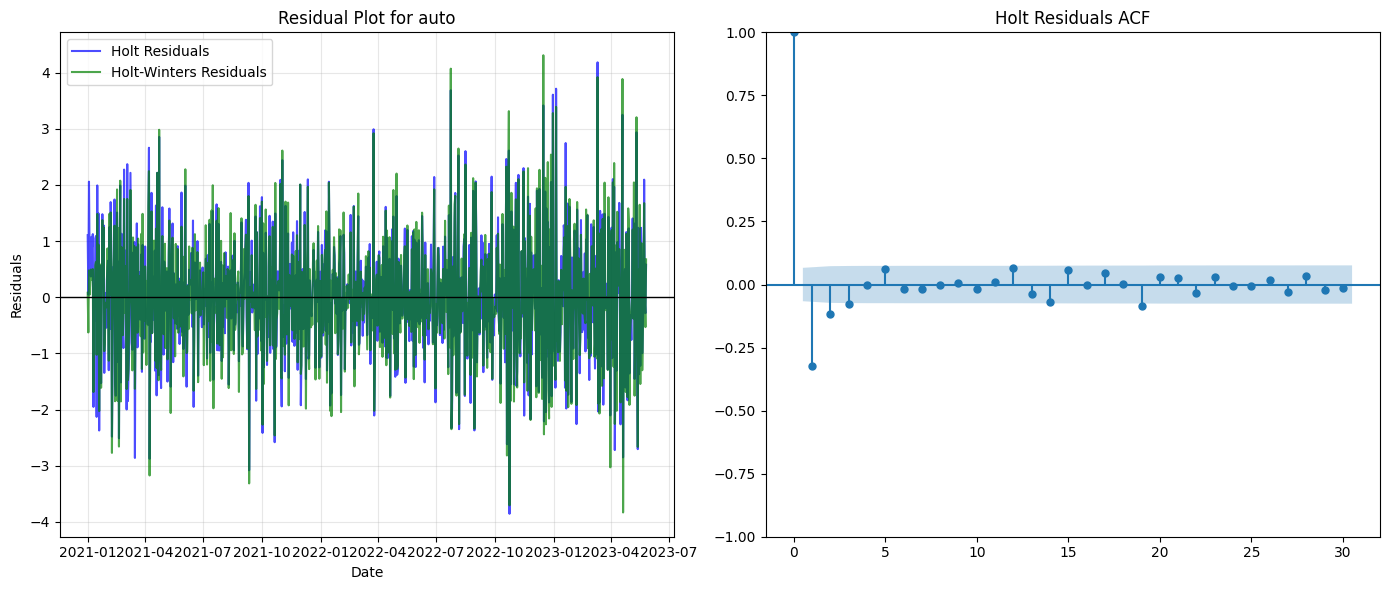

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


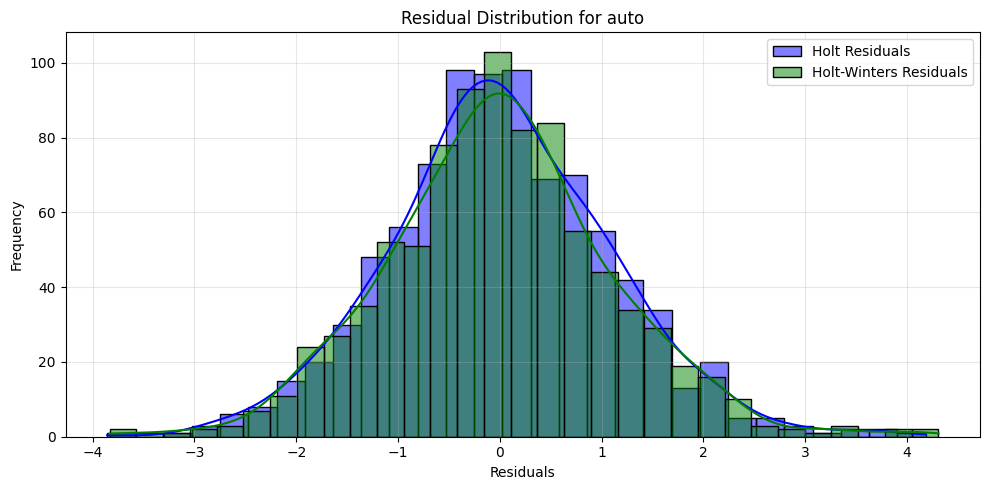

/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


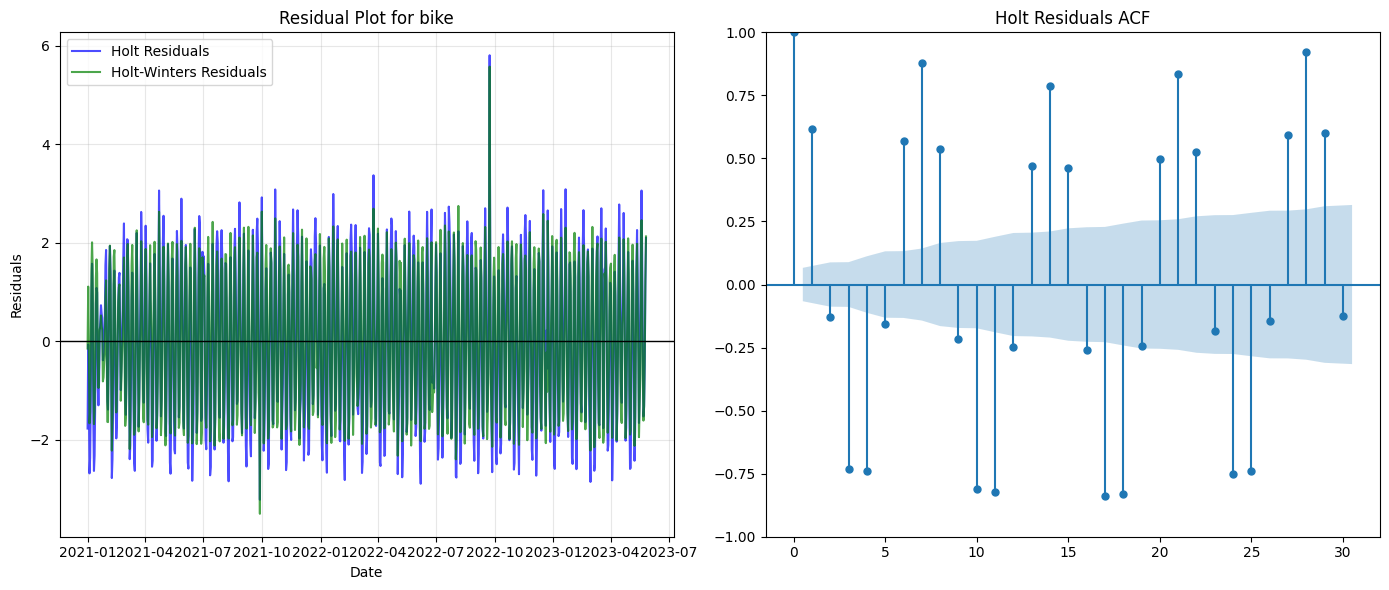

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


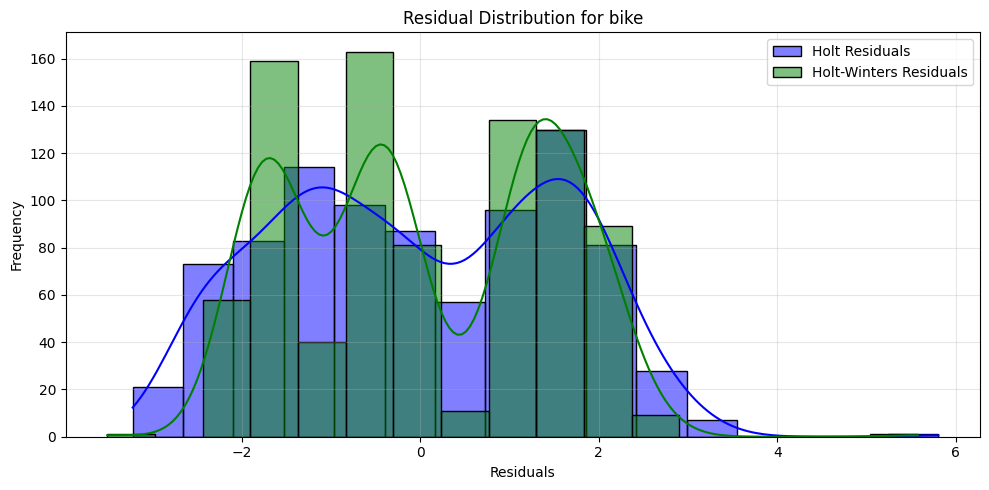

/tmp/ipykernel_30/535868138.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/535868138.py:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipykernel_30/535868138.py:28: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


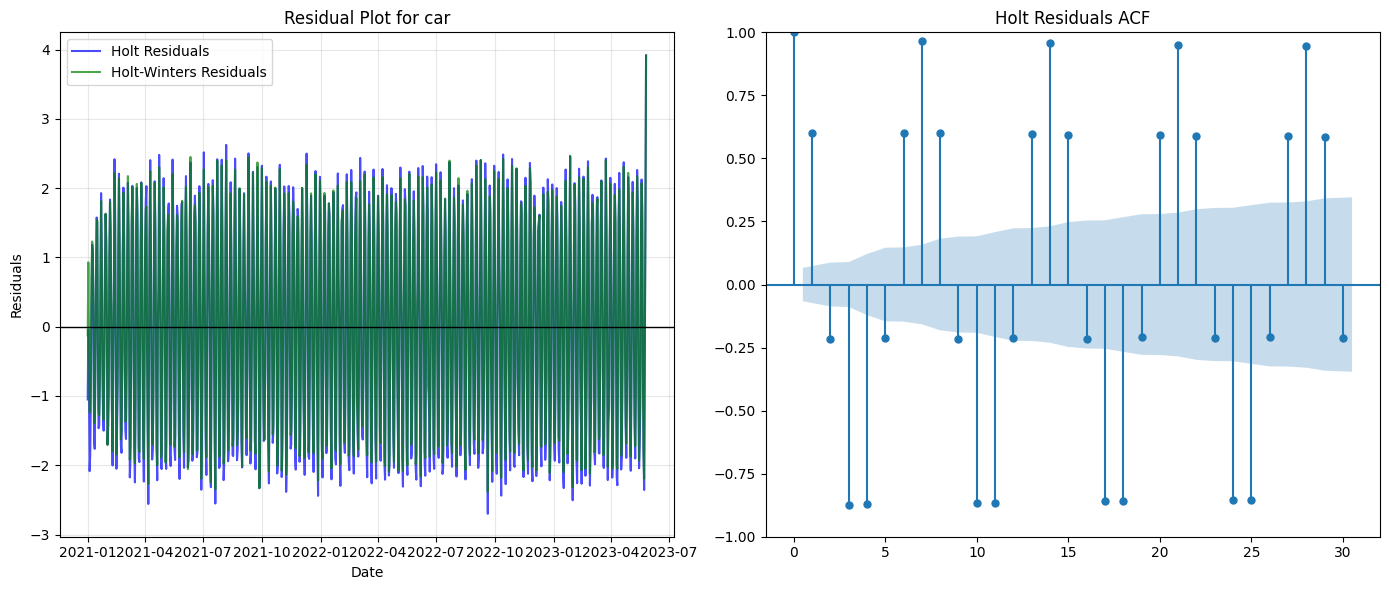

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


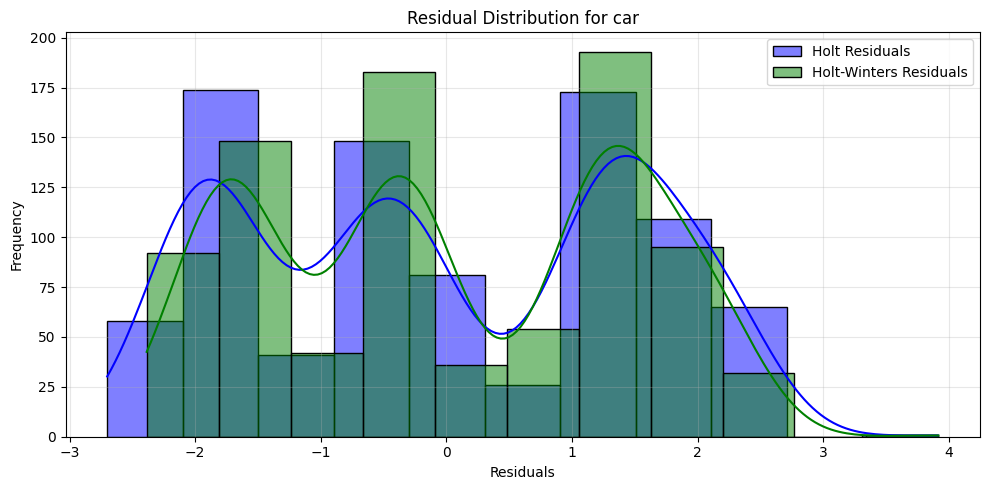

In [47]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set forecasting parameters
forecast_period = 60

# Dictionary to store forecasts and residuals
forecast_results = {}

for vehicle, group in train.groupby('vehicle_type'):
    # Sort data by timestamp and set timestamp as index
    group = group.sort_values(by='timestamp')
    group.set_index('timestamp', inplace=True)
    average_fare = group['average_fare']
    
    # Ensure the index is datetime and has regular frequency
    average_fare.index = pd.to_datetime(average_fare.index)
    average_fare = average_fare.resample('D').mean().fillna(method='ffill')
    
    # Holt's Linear Trend Model
    holt_model = Holt(average_fare).fit(smoothing_level=0.8, smoothing_slope=0.2)
    holt_residuals = average_fare - holt_model.fittedvalues
    
    # Holt-Winters Seasonal Model
    hw_model = ExponentialSmoothing(
        average_fare,
        trend='add',
        seasonal='add',
        seasonal_periods=30,
        damped=True
    ).fit(smoothing_level=0.8, smoothing_trend=0.2, smoothing_seasonal=0.1)
    
    hw_residuals = average_fare - hw_model.fittedvalues

    # Store results
    forecast_results[vehicle] = {
        'holt_residuals': holt_residuals,
        'hw_residuals': hw_residuals
    }

    # Plot Residuals
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(holt_residuals, label='Holt Residuals', color='blue', alpha=0.7)
    plt.plot(hw_residuals, label='Holt-Winters Residuals', color='green', alpha=0.7)
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f'Residual Plot for {vehicle}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Autocorrelation of Residuals
    plt.subplot(1, 2, 2)
    plot_acf(holt_residuals.dropna(), lags=30, ax=plt.gca(), title='Holt Residuals ACF')
    plt.tight_layout()
    plt.show()

    # Distribution of Residuals
    plt.figure(figsize=(10, 5))
    sns.histplot(holt_residuals, kde=True, color='blue', label='Holt Residuals', alpha=0.5)
    sns.histplot(hw_residuals, kde=True, color='green', label='Holt-Winters Residuals', alpha=0.5)
    plt.title(f'Residual Distribution for {vehicle}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/2541890156.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average_fare = average_fare.resample('D').mean().fillna(method='ffill')
/tmp/ipykernel_30/2541890156.py:20: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_model = ExponentialSmoothing(


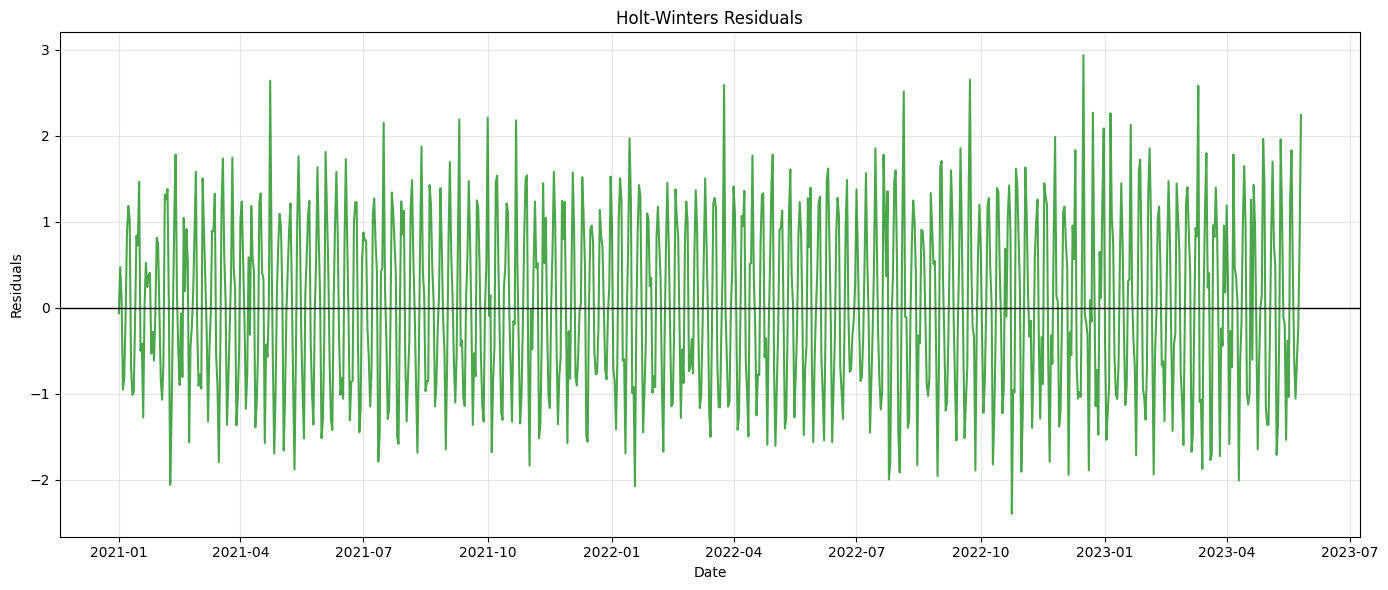

<Figure size 1000x500 with 0 Axes>

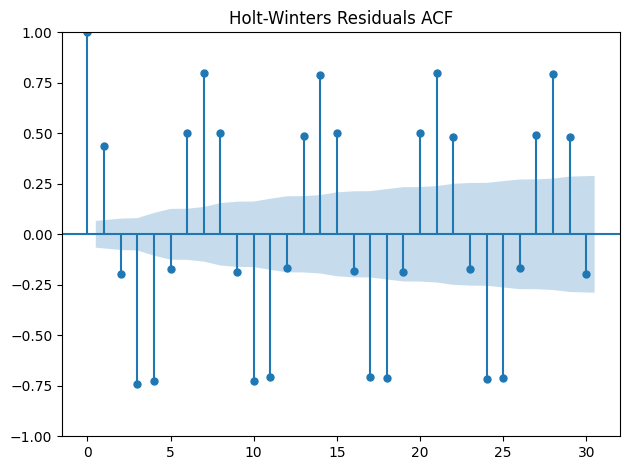

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


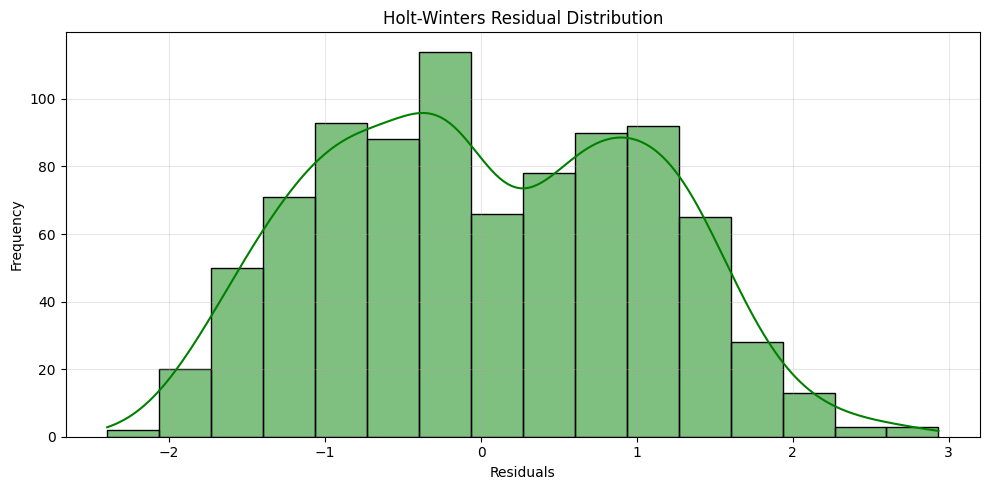

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set forecasting parameters
forecast_period = 60

# Preprocess the data (assuming 'average_fare' column is available in 'train' DataFrame)
train = train.sort_values(by='timestamp')
train.set_index('timestamp', inplace=True)
average_fare = train['average_fare']

# Ensure the index is datetime and has regular frequency
average_fare.index = pd.to_datetime(average_fare.index)
average_fare = average_fare.resample('D').mean().fillna(method='ffill')

# Holt-Winters Seasonal Model
hw_model = ExponentialSmoothing(
    average_fare,
    trend='add',
    seasonal='add',
    seasonal_periods=30,
    damped=True
).fit(smoothing_level=0.8, smoothing_trend=0.2, smoothing_seasonal=0.1)

# Calculate residuals
hw_residuals = average_fare - hw_model.fittedvalues

# Plot Residuals
plt.figure(figsize=(14, 6))
plt.plot(hw_residuals, color='green', alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.title('Holt-Winters Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Autocorrelation of Residuals
plt.figure(figsize=(10, 5))
plot_acf(hw_residuals.dropna(), lags=30)
plt.title('Holt-Winters Residuals ACF')
plt.tight_layout()
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(hw_residuals, kde=True, color='green', alpha=0.5)
plt.title('Holt-Winters Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

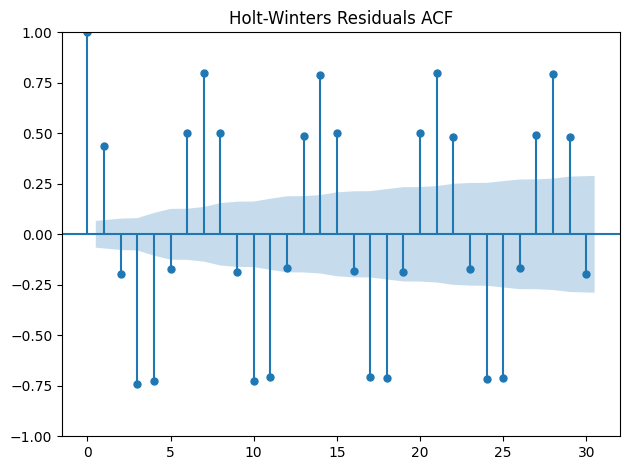

<Figure size 1000x500 with 0 Axes>

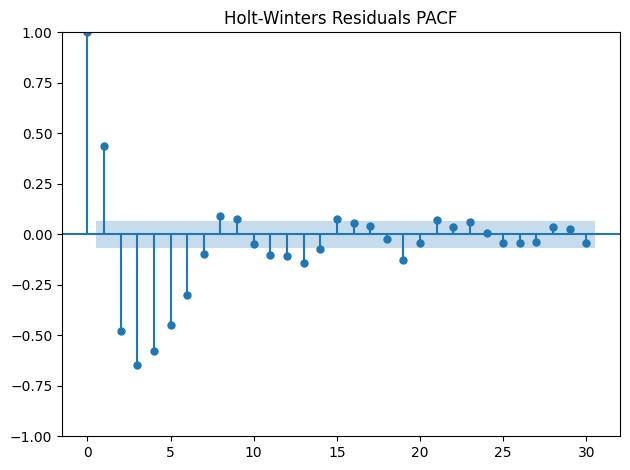

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF of Residuals
plt.figure(figsize=(10, 5))
plot_acf(hw_residuals.dropna(), lags=30)
plt.title('Holt-Winters Residuals ACF')
plt.tight_layout()
plt.show()

# Plot PACF of Residuals
plt.figure(figsize=(10, 5))
plot_pacf(hw_residuals.dropna(), lags=30)
plt.title('Holt-Winters Residuals PACF')
plt.tight_layout()
plt.show()


ACF and PACF 

ACF at lag 1: The ACF plot at lag 1 shows the correlation between the residuals at time t and the residuals at time t-1. If there's significant autocorrelation at lag 1, it indicates that there is still structure in the residuals, which the model has not fully captured.
PACF at lag 1: The PACF plot at lag 1 tells the correlation between the residuals at time t and the residuals at time t-1, after removing the effect of intermediate lags. A significant value here at lag 1 suggests that the model might need adjustments.


In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure residuals have no NaN values before applying the Ljung-Box test
hw_residuals_cleaned = hw_residuals.dropna()

# Perform Ljung-Box Test on the residuals
ljung_box_test = acorr_ljungbox(hw_residuals_cleaned, lags=[10, 20, 30], return_df=True)

# Display the Ljung-Box Test Results
print("Ljung-Box Test Results:")
print(ljung_box_test)


Ljung-Box Test Results:
        lb_stat  lb_pvalue
10  2682.268792        0.0
20  5327.821415        0.0
30  8111.203661        0.0


Since the p-values are extremely low we have evidence that the residuals are not independent and still contain autocorrelation. This indicates that the Holt-Winters model has not fully captured all the structure in the data, and further modeling improvements may be necessary to better fit the residuals (for example, by incorporating additional components, adjusting model parameters, or using different forecasting techniques).

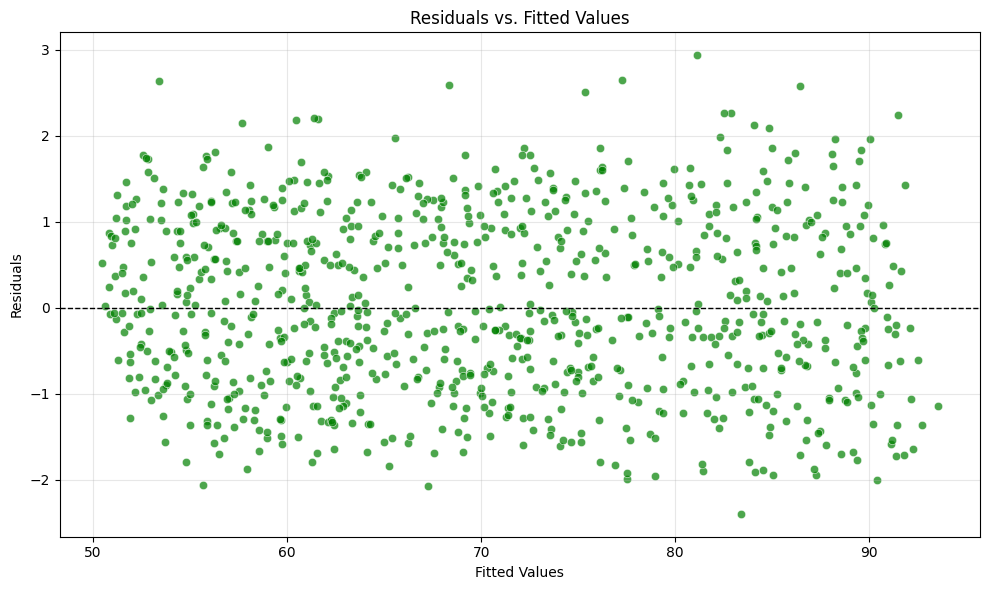

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hw_model' is your Holt-Winters model and 'hw_residuals' are the calculated residuals
# Calculate fitted values from the model
fitted_values = hw_model.fittedvalues

# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=hw_residuals, alpha=0.7, color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Trend or Clustering: If there’s a trend in the residuals or they are systematically above or below zero, it means that the model is missing some trend component.

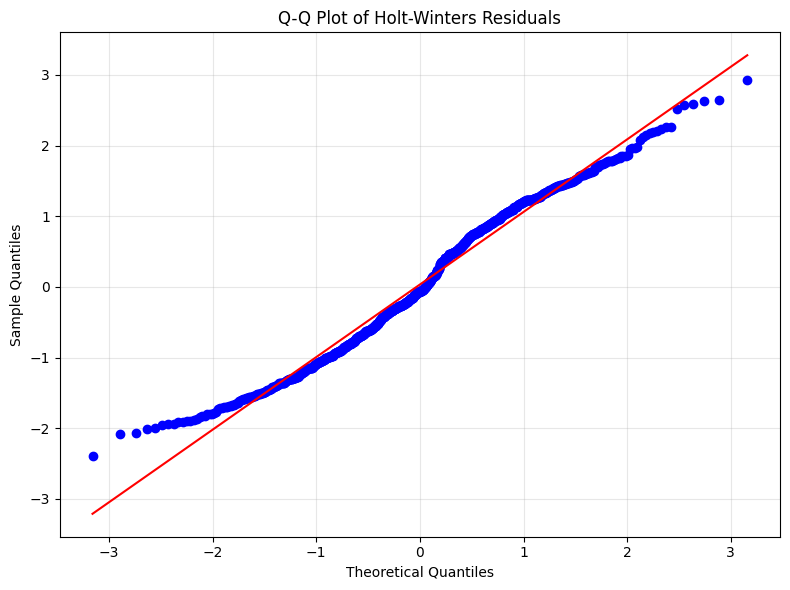

In [52]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'hw_residuals' are the residuals from your Holt-Winters model
# Ensure no NaN values in residuals before plotting
hw_residuals_cleaned = hw_residuals.dropna()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(hw_residuals_cleaned, dist="norm", plot=plt)
plt.title('Q-Q Plot of Holt-Winters Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Non-normal residuals:  the Q-Q plot shows large deviations from the line, it suggests that the residuals are not normally distributed, and we need to: 
Recheck the  model for misspecification.
Consider transformations (e.g., logarithmic, square root) to stabilize variance or normalize the distribution of residuals




Critical Analysis and Model Improvements:

Missed Patterns: The consistent autocorrelation in residuals and non-normality in residual distribution indicate that the Holt-Winters model might not fully capture all aspects of the data structure, especially in capturing short-term autocorrelation and potentially non-linear trends.
Suggested Improvements:
Incorporate ARIMA components: A seasonal ARIMA model (SARIMA) might improve fit by directly accounting for both trend, seasonality, and autocorrelation patterns.
Explore transformations: Apply log or square root transformations if variance is high or the Q-Q plot shows heavy tails.
Hybrid Modeling: Combining Holt-Winters with other models, such as ARIMA for residuals, could be effective in capturing remaining autocorrelation structures.


Reflection: This analysis highlights the importance of a thorough residual diagnostic process for time series models. It has shown that while Holt-Winters is useful for capturing basic trend and seasonality, it may fall short for datasets with complex autocorrelation or non-linear structures.

**Auto:** 

Historical Data (2021-2023): Average fare consistently maintained between 40-44Rs. Shows high frequency, low amplitude volatility. Mean appears to be approximately 41-42Rs. No significant seasonal patterns visible. Remarkably stable pricing with no clear upward or downward trend. Suggests mature market with established pricing dynamics


Holt Forecast: Shows an aggressive upward trend. Predicts dramatic increase to approximately 54Rs. Forecast appears unrealistic given historical stability. The sharp upward trajectory suggests potential model overfitting. This forecast seems least reliable given historical patterns. 


Holt-Winters Forecast: Predicts continued stability around 43Rs. Shows minor fluctuations in the forecast period. More closely aligns with historical patterns. Appears more credible given past data. Suggests roughly 2-3% variation from current levels. More suitable for business planning purposes. Takes into account potential seasonality effects



**Bike:** 

Historical Data (gray line): Shows actual average fares from early 2021 to mid-2023. Demonstrates an overall upward trend. Contains noticeable fluctuations/seasonality. Starts around 20Rs in early 2021 and reaches about 80Rs by mid-2023


Holt Forecast (blue dashed line): Shows a more aggressive upward trend prediction. Projects a steep increase reaching about Rs120+ in the forecast period. Appears to be more linear and doesn't account for seasonal patterns. Might be overestimating the growth rate based on recent trends


Holt-Winters Forecast (green dashed line): Shows a more conservative prediction. Maintains the seasonal patterns seen in historical data. Projects fares to fluctuate around 80-85Rs. Appears to be more realistic given the historical pattern



**Car:** 

Historical Data (2021-2023): Shows a clear, strong upward trend. Starting point: approximately 90-95Rs in early 2021. Ending point: approximately 155-160Rs in early 2023. Represents roughly a 70% increase over two years. Consistent upward momentum with regular small fluctuations. Linear growth pattern suggests systematic price increases. Shows less volatility compared to auto service fares. Indicates strong pricing power and market acceptance of increases


Holt Forecast: Projects continued aggressive upward trend. Predicts reaching approximately 185-190Rs by mid-2023. Maintains the steep upward trajectory seen in historical data. Shows no signs of growth rate slowing. Suggests about a 20% increase from current levels. More aggressive prediction compared to Holt-Winters. Extends the linear trend without considering potential market saturation


Holt-Winters Forecast: More conservative upward projection. Predicts stabilization around 160Rs. Suggests potential market price ceiling. Shows flattening of the growth curve. More modest 3-5% increase from current levels. Takes into account possible seasonal patterns. Appears to factor in market saturation effects

**Business Implications for RideWave:**

Bike: Sustained price growth from 20Rs to 80Rs (2021-2023) demonstrates robust pricing power. Holt forecast's aggressive projection (Rs120+) likely overoptimistic. Holt-Winters' moderated growth (Rs80-85) aligns with typical market maturation patterns. Divergence signals increasing uncertainty about sustainable price growth. Monitor price elasticity as service moves into higher price brackets.

Car: Strong historical price growth indicates significant pricing power. Divergence between forecasts suggests uncertainty about future growth potential. Holt-Winters forecast may be more realistic as markets typically show eventual price resistance. Business should plan for continued but potentially moderating price growth. Consider price elasticity and customer retention at higher price points



### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

In [63]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [64]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.set_index('timestamp', inplace=True)
model = SARIMAX(
    train['average_fare'],
    order=(1, 1, 1),  # ARIMA parameters
    seasonal_order=(1, 1, 1, 12)  # Seasonal parameters for monthly data
)


sarimax_result = model.fit()


print(sarimax_result.summary())




/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81584D+00    |proj g|=  1.08905D+00

At iterate    5    f=  5.15047D+00    |proj g|=  3.76965D-02

At iterate   10    f=  4.95314D+00    |proj g|=  5.58085D-02

At iterate   15    f=  4.91553D+00    |proj g|=  2.40414D-03
  ys=-5.518E-05  -gs= 3.921E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     37      1     1     0   6.096D-04   4.916D+00
  F =   4.9155121934526846     

CONVERGENCE: REL_

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_30/217672962.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


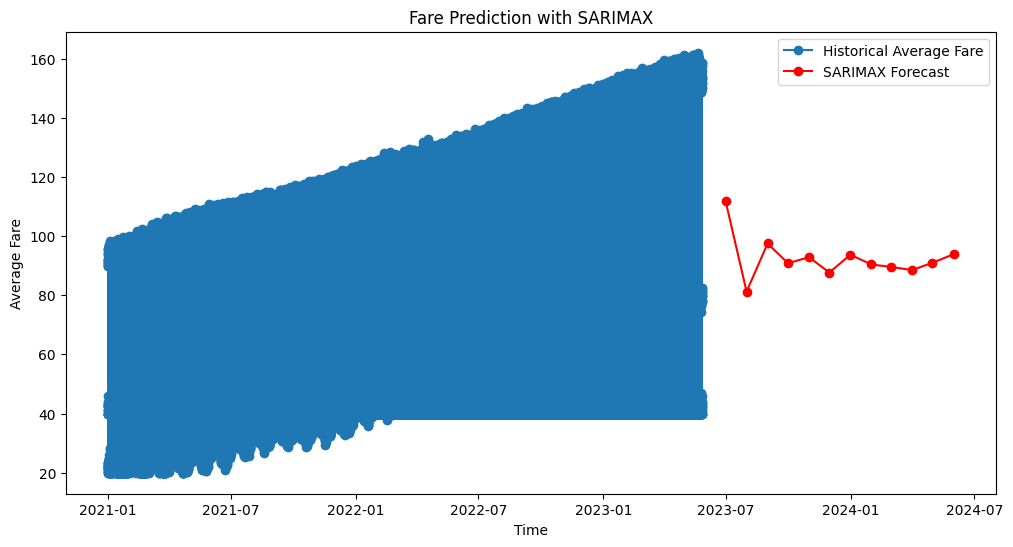

In [65]:
# Step 3: Forecasting for the next 12 months
forecast_steps = 12
forecast = sarimax_result.get_forecast(steps=forecast_steps)

# Get predicted mean values
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['average_fare'], label='Historical Average Fare', marker='o')
plt.plot(forecast_index, forecast_values, label='SARIMAX Forecast', color='red', marker='o')
plt.title('Fare Prediction with SARIMAX')
plt.xlabel('Time')
plt.ylabel('Average Fare')
plt.legend()
plt.show()

In [66]:

# Step 4: Perform Feature Engineering
# Create lagged features for driver availability, special events, and traffic index
train ['driver_availability_lag1'] = train['driver_availability'].shift(1)
train['special_event_lag1'] = train['special_event'].shift(1)
train['traffic_index_lag1'] = train['traffic_index'].shift(1)

# Drop rows with NaN values due to lagging
train.dropna(inplace=True)

# Step 5: Update SARIMAX Model with Exogenous Variables
# Define the new model with exogenous variables
model_with_exog = SARIMAX(
    train['average_fare'],
    exog=train[['driver_availability_lag1', 'special_event_lag1', 'traffic_index_lag1']],  # Include relevant features
    order=(1, 1, 1),  # ARIMA parameters
    seasonal_order=(1, 1, 1, 12)  # Seasonal parameters for monthly data
)

# Fit the model
sarimax_with_exog_result = model_with_exog.fit()

# Print model summary
print(sarimax_with_exog_result.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25523D+00    |proj g|=  1.21938D-01


 This problem is unconstrained.



At iterate    5    f=  5.11447D+00    |proj g|=  1.69103D-02

At iterate   10    f=  4.97171D+00    |proj g|=  1.00241D-01

At iterate   15    f=  4.89252D+00    |proj g|=  1.76107D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     39      1     0     0   7.764D-04   4.893D+00
  F =   4.8925146613337560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                       average_fare   No. Observations:                63014
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -308296.919
Date:                            Thu, 14 Nov 2024   AIC                         616609.838
Time:                                    12:40:16   BIC    

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


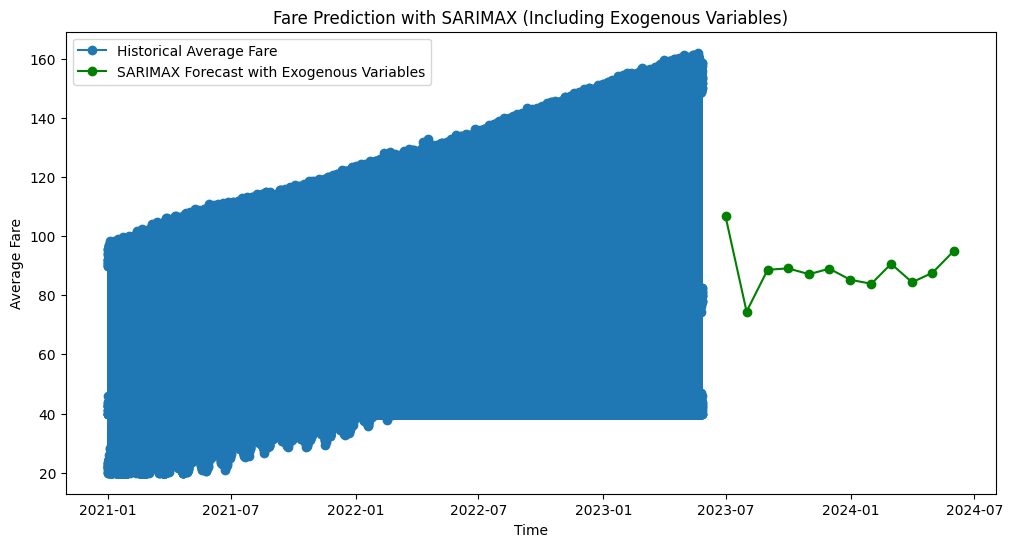

<function matplotlib.pyplot.show(close=None, block=None)>

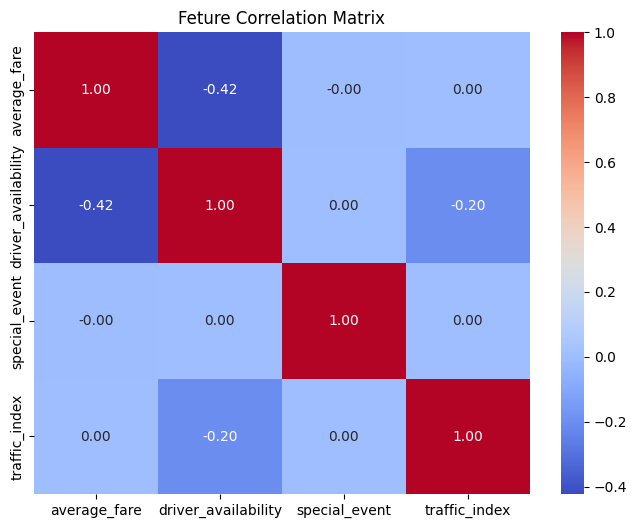

In [67]:
 #Step 6: Forecasting with Exogenous Variables
forecast_with_exog = sarimax_with_exog_result.get_forecast(steps=forecast_steps,
    exog=train[['driver_availability_lag1', 'special_event_lag1', 'traffic_index_lag1']].iloc[-forecast_steps:])

# Get predicted mean values
forecast_values_with_exog = forecast_with_exog.predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['average_fare'], label='Historical Average Fare', marker='o')
plt.plot(forecast_index, forecast_values_with_exog, label='SARIMAX Forecast with Exogenous Variables', color='green', marker='o')
plt.title('Fare Prediction with SARIMAX (Including Exogenous Variables)')
plt.xlabel('Time')
plt.ylabel('Average Fare')
plt.legend()
plt.show()

# Step 7: Analyzing Feature Importance
# Correlation matrix
correlation = train[['average_fare', 'driver_availability', 'special_event', 'traffic_index']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feture Correlation Matrix')
plt.show

SARIMAX was choosen for this as 
* SARIMAX captures both trend and seasonality 
* It allows us to leverage past values and prev forecast errors 
* Inclusion of exogenous variables to improve the accuracy 


Rationale behind the feature engineering 
- Driver avalablility lag- created a lagged feature for driver availabity to capture its effect on fares.A higher availability might lead to lower fares, as more drivers can fulfill demand without requiring surge pricing.
- Special Event lag- special events lead to increased fares due to high demand.Lagging this allows us to focus on effects of past events on previous fares
- Traffic Index lag- traffic conditions influence ride times and subsequent pricing.Lagging this feature provides insights into how prior traffic conditions affect fare predictions.


Interpreting model results 
* Lower AIC and BIC results which indicates better model fit when compared with different models 
* Significant variables  based on SARIMAX 


Driver Availability:  0.4605


Special Events: 1.1547



Traffic Index:  0.0701 



1. Driver Availability- indicates that higher driver availability leads to an increase in average fares.
2. Special Events - when special events occurs fares increases significantly
3. Traffic Index - as Traffic Index increases the ride price also seems to increase , likely due to longer ride times affecting pricing.


ARMA Coefficients 



AR (1): The negative coefficient (-0.4137) suggests that fare prices exhibit mean-reverting behavior; if fares are high in one period, they tend to drop in the next period.


MA (1): The coefficient close to -1 (-0.9982) implies that past errors heavily influence current fare prices, suggesting that the model quickly corrects itself based on previous forecast errors.






Implications on Ridewaves business models 
1. Resource management- Ridewave should focus on optimizing driver deployement as suggested from positive relation between driver availability and average fare price.During high demand period more drivers can be made available leading to enhanced customer satisfaction 
2. Dynamic pricing statergy- Strong co-relation between average fare price on special events suggest that RideWave should implement dynamic pricing strategies, adjusting fares based on anticipated demand during known events. This could maximize revenue during peak times while attracting more customers during lower demand periods.
3. Traffic conditions - understanding the relation b/w traffic hours and prices is crucial RideWave may need to monitor traffic patterns closely and consider integrating traffic data into its pricing algorithms to better predict fare fluctuations

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import joblib 

# Sample structure for your training dataset
# Assuming your dataset has columns: ['average_fare', 'driver_availability', 'special_event', 'traffic_index']
# And it includes a 'vehicle_type' column that indicates bike, auto, or car.

# Fit SARIMAX models for each vehicle type
# Ensure 'train' DataFrame contains vehicle type distinctions.

# Create empty DataFrames to store predictions
predictions = pd.DataFrame()

for vehicle in ['bike', 'auto', 'car']:
    # Filter training data for the specific vehicle type
    train_vehicle = train[train['vehicle_type'] == vehicle]

    # Create lagged and other features as needed
    # Here you will need to include the necessary feature engineering steps again

    # Define and fit the SARIMAX model
    model = SARIMAX(
        train_vehicle['average_fare'],
        exog=train_vehicle[['driver_availability_lag1', 'special_event_lag1', 'traffic_index_lag1']],  # Include relevant features
        order=(1, 1, 1),  # ARIMA parameters
        seasonal_order=(1, 1, 1, 12)  # Seasonal parameters for monthly data
    )
    
    # Fit the model
    model_result = model.fit()
    joblib.dump(model_result, f'{vehicle}_sarimax_model.pkl')

    # Generate predictions for the entire dataset (or a specific timeframe)
    pred = model_result.predict(start=0, end=len(train_vehicle)-1, exog=train_vehicle[['driver_availability_lag1', 'special_event_lag1', 'traffic_index_lag1']])
    
    # Store predictions in the DataFrame
    predictions[f'average_fare_{vehicle}'] = pred

# Assuming you have a true values DataFrame for each vehicle type
# Replace these with your actual true values

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69870D+00    |proj g|=  2.84602D-01


 This problem is unconstrained.



At iterate    5    f=  1.60500D+00    |proj g|=  5.11625D+00

At iterate   10    f=  1.57098D+00    |proj g|=  5.34347D-01

At iterate   15    f=  1.53956D+00    |proj g|=  6.68862D-01

At iterate   20    f=  1.51956D+00    |proj g|=  4.94944D-02

At iterate   25    f=  1.51045D+00    |proj g|=  4.35721D-01

At iterate   30    f=  1.50810D+00    |proj g|=  1.80465D-01

At iterate   35    f=  1.49266D+00    |proj g|=  1.93447D-01

At iterate   40    f=  1.48460D+00    |proj g|=  2.56870D-01

At iterate   45    f=  1.48305D+00    |proj g|=  1.00255D-01

At iterate   50    f=  1.48192D+00    |proj g|=  1.93354D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26266D+00    |proj g|=  8.15204D-01

At iterate    5    f=  2.20603D+00    |proj g|=  3.96941D+00

At iterate   10    f=  1.99739D+00    |proj g|=  4.05069D-01

At iterate   15    f=  1.96776D+00    |proj g|=  8.89571D-01

At iterate   20    f=  1.79205D+00    |proj g|=  2.54966D-01

At iterate   25    f=  1.76318D+00    |proj g|=  1.00860D+00

At iterate   30    f=  1.73220D+00    |proj g|=  2.00985D-02

At iterate   35    f=  1.73181D+00    |proj g|=  3.27019D-01

At iterate   40    f=  1.72717D+00    |proj g|=  1.17075D-01

At iterate   45    f=  1.72674D+00    |proj g|=  1.04499D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.72629D+00    |proj g|=  1.09793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   1.098D-02   1.726D+00
  F =   1.7262944097994006     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63400D+00    |proj g|=  7.41529D-01

At iterate    5    f=  1.61997D+00    |proj g|=  4.01273D+00

At iterate   10    f=  1.55572D+00    |proj g|=  9.30650D-02

At iterate   15    f=  1.53857D+00    |proj g|=  3.05859D+00

At iterate   20    f=  1.41254D+00    |proj g|=  3.54463D+00

At iterate   25    f=  1.40472D+00    |proj g|=  3.44712D-01

At iterate   30    f=  1.38621D+00    |proj g|=  5.67583D-01

At iterate   35    f=  1.38479D+00    |proj g|=  3.17041D-02

At iterate   40    f=  1.38324D+00    |proj g|=  2.71129D-01

At iterate   45    f=  1.38086D+00    |proj g|=  1.91127D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.38081D+00    |proj g|=  8.30543D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   8.305D-02   1.381D+00
  F =   1.3808050093623043     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [70]:
# Initialize empty lists for each vehicle type
average_fare_bike = []
average_fare_auto = []
average_fare_car = []

# Loop through the train DataFrame and separate fares by vehicle type
for _, row in train.iterrows():
    if row['vehicle_type'] == 'bike':
        average_fare_bike.append(row['average_fare'])
        average_fare_auto.append(np.nan)  # Fill with NaN to keep indexing consistent
        average_fare_car.append(np.nan)
    elif row['vehicle_type'] == 'auto':
        average_fare_bike.append(np.nan)
        average_fare_auto.append(row['average_fare'])
        average_fare_car.append(np.nan)
    elif row['vehicle_type'] == 'car':
        average_fare_bike.append(np.nan)
        average_fare_auto.append(np.nan)
        average_fare_car.append(row['average_fare'])

# Create a new DataFrame with each vehicle type as a column
true_values_df = pd.DataFrame({
    'average_fare_bike': average_fare_bike,
    'average_fare_auto': average_fare_auto,
    'average_fare_car': average_fare_car
})

-

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





In [71]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
bike_data = train[train['vehicle_type'] == 'bike']
target = bike_data['average_fare']
exog_vars = bike_data[['driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
sarimax_model = SARIMAX(target, exog=exog_vars, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
sarimax_result = sarimax_model.fit()
forecast = sarimax_result.get_forecast(steps=24, exog=exog_vars[-24:])
forecast_values = forecast.predicted_mean
print(forecast_values)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62494D+00    |proj g|=  3.87415D-01


 This problem is unconstrained.



At iterate    5    f=  1.60093D+00    |proj g|=  2.97969D+00

At iterate   10    f=  1.49577D+00    |proj g|=  1.75032D-01

At iterate   15    f=  1.44223D+00    |proj g|=  1.00532D-01

At iterate   20    f=  1.43145D+00    |proj g|=  6.76965D-02

At iterate   25    f=  1.42493D+00    |proj g|=  7.94599D-02

At iterate   30    f=  1.41768D+00    |proj g|=  1.99828D-01

At iterate   35    f=  1.40942D+00    |proj g|=  3.53278D-01

At iterate   40    f=  1.40323D+00    |proj g|=  8.53103D-02

At iterate   45    f=  1.40282D+00    |proj g|=  1.28575D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.40279D+00    |proj g|=  1.12464D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   1.125D-02   1.403D+00
  F =   1.4027935465314192     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
2023-05-26 05:00:00    81.716984
2023-05-26 06:00:00    82.254243
2023-05-26 07:00:00    81.818698
2023-05-26 08:00:00    81.302544
2023-05-26 09:00:00    82.460322
2023-05-26 10:00:00    81.661204
2023-05-26 11:00:00    82.881204
2023-05-26 12:00:00    81.335115
2023-05-26 13:00:00    82.259548
2023-05-26 14:00:00    81.114152
2023-05-26 15:00:00    81.39610

In [72]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
car_data = train[train['vehicle_type'] == 'car']
features = car_data[['rides_completed', 'driver_availability', 'surge_multiplier', 'weather', 'traffic_index', 'special_event']].copy()
target = car_data['average_fare']
features['weather'] = features['weather'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=['weather'])
catboost_model.fit(X_train, y_train, verbose=50)
y_pred = catboost_model.predict(X_test)
print(y_pred)


0:	learn: 18.3140669	total: 68.2ms	remaining: 34s
50:	learn: 14.3562880	total: 421ms	remaining: 3.71s
100:	learn: 13.3992614	total: 739ms	remaining: 2.92s
150:	learn: 12.7197936	total: 1.08s	remaining: 2.49s
200:	learn: 12.3387543	total: 1.4s	remaining: 2.08s
250:	learn: 12.0754290	total: 1.72s	remaining: 1.71s
300:	learn: 11.9166206	total: 2.03s	remaining: 1.34s
350:	learn: 11.7695866	total: 2.4s	remaining: 1.02s
400:	learn: 11.6673512	total: 2.71s	remaining: 669ms
450:	learn: 11.5790507	total: 3.02s	remaining: 328ms
499:	learn: 11.4884810	total: 3.34s	remaining: 0us
[142.05779806 110.20894549 102.55131604 ... 139.60956713 137.03105816
 133.93237686]


In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for 'auto' type
auto_data = train[train['vehicle_type'] == 'auto'].copy()

# Select features and target
features = ['rides_completed', 'driver_availability', 'surge_multiplier', 
            'traffic_index', 'special_event', 'driver_availability_lag1', 
            'special_event_lag1', 'traffic_index_lag1']
X = auto_data[features]
y = auto_data['average_fare']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1.2611443826904427
Root Mean Squared Error: 1.7150956146536334


Based on the given data, the average fare for an auto seems to be consistent, with most values in a similar range. However, for the average fares for bike and car, there is a noticeable jump, approximately quadrupling as the fare values increase per column.

I have chosen the following models for each vehicle type:

SARIMAX for bike
CatBoost for car
XGBoost for auto
For bike data, SARIMAX is an excellent choice due to its ability to handle time series analysis. This model effectively captures seasonal patterns and trends, making it ideal for understanding bike ridership over different times of the year. Additionally, SARIMAX can incorporate external factors, such as weather conditions or special events, which can significantly influence bike usage.

When it comes to car data, CatBoost stands out for its capability to handle a wealth of categorical features, such as vehicle brands and models, without extensive preprocessing. This makes it particularly effective for tasks like predicting fare prices or driver ratings. CatBoost is known for its robust performance, as it generalizes well across diverse datasets and offers quick training times, which is especially beneficial when working with larger datasets.

Lastly, XGBoost is a fitting choice for auto data, particularly for handling structured data with high predictive accuracy. XGBoost uses an ensemble of gradient-boosted trees, which excels at capturing complex, non-linear relationships in the data. Known for its efficiency and ability to reduce overfitting, XGBoost is well-suited for tasks involving price prediction and volatility. This model's capability to handle large datasets and its regularization techniques make it highly reliable for scenarios with potential noise or fluctuations in fare data. Together, these models reflect a thoughtful approach to leveraging the strengths of each algorithm based on the unique characteristics of the datasets involved.

In [74]:
# Now split average_fare based on vehicle_type
true_values_df = train.pivot(columns='vehicle_type', values='average_fare')
true_values_df.columns = ['average_fare_bike', 'average_fare_auto', 'average_fare_car']
# Assuming 'timestamp' is the shared index in both DataFrames
true_values_df = true_values_df.loc[predictions.index]
def smape(y_true, y_pred):
    """Calculate sMAPE between true and predicted values."""
    return 100 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Calculate SMAPE for each vehicle type
smape_bike = smape(true_values_df['average_fare_bike'].fillna(0), predictions['average_fare_bike'].fillna(0))
smape_auto = smape(true_values_df['average_fare_auto'].fillna(0), predictions['average_fare_auto'].fillna(0))
smape_car = smape(true_values_df['average_fare_car'].fillna(0), predictions['average_fare_car'].fillna(0))

overall_smape = (smape_bike + smape_auto + smape_car) // 3

print("sMAPE for Bike:", int(smape_bike))
print("sMAPE for Auto:", int(smape_auto))
print("sMAPE for Car:", int(smape_car))
print("Overall sMAPE:", int(overall_smape))

sMAPE for Bike: 16
sMAPE for Auto: 16
sMAPE for Car: 0
Overall sMAPE: 11


## Example submission, just for your reference

In [ ]:
submission = pd.DataFrame()
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv')


## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [ ]:
submission['timestamp'] = sample_submission['timestamp']
submission['average_fare_bike'] = sample_submission['average_fare_bike']
submission['average_fare_auto'] = sample_submission['average_fare_auto']
submission['average_fare_car'] = sample_submission['average_fare_car']

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟** 